### 넘파이의 이해
- "\<br\>"은 엔터 기능 <br><br>
`넘파이와 리스트의 차이`<br>
- 리스트 : 길이와 형식의 구별없이 대이터를 한개의 변수에 할당 가능한 자료 구조
- array(배열) : 길이와 형식이 일치하는 자료셋
- npy, npz 저장가능 -> np.load로 자료를 호출
- npz로 저장된 자료는 서로다름 array를 저장한는 구조

In [191]:
# 넘파이 설치
# !pip install numpy

In [192]:
import numpy as np

a = np.array([[1, 2, 3, 4, "gg"], [1, 3]])
# 넘파이에서는 문자열이 포함 되지 않는다.
# 배열의 순서가 정확하게 맞아야 한다.

C:\Users\HP\AppData\Local\Temp\ipykernel_15348\3679608735.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([[1, 2, 3, 4, "gg"], [1, 3]])


In [193]:
a = [[[255, 0, 0], [0, 255, 0], [0, 255, 255]], [[0, 0, 0], [0, 0, 255], [0, 255, 0]]]
type(a),np.shape(a)
np.array(a)

array([[[255,   0,   0],
        [  0, 255,   0],
        [  0, 255, 255]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [  0, 255,   0]]])

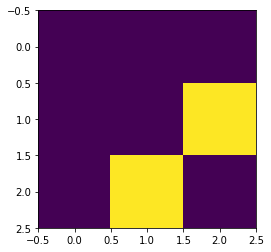

In [194]:
import matplotlib.pyplot as plt

a = [[[255, 0, 0], [0, 255, 0], [0, 255, 255]], [[0, 0, 0], [0, 0, 255], [0, 255, 0]],
    [[0, 0, 0], [0, 255, 0], [0, 255, 255]], [[0, 0, 0], [0, 0, 255], [0, 255, 0]]]

np.array(a)


plt.imshow(a[1])

In [195]:
a = [[[255, 0, 0], [0, 255, 0], [0, 255, 255]], [[0, 0, 0], [0, 0, 255], [0, 255, 0]],
    [[0, 0, 0], [0, 255, 0], [0, 255, 255]], [[0, 0, 0], [0, 0, 255], [0, 255, 0]]]

np.array(a)

b = [1, 0]

# 구글검색 npz 저장
np.savez('test.npz', x = a, y = b)
# np.save('test.npy', test[0], test[1])

In [208]:
data = np.load('test.npz')
list(data)
Xdata,Ydata = data['x'], data['y']

In [211]:
print(Ydata)
print(list(data)) # 넘파이의 구조를 알기 위해서 리스트를 활용

[1 0]
['x', 'y']


In [212]:
# 텐서플로 설치
# !pip install tensorflow-cpu

In [213]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
tmp = mnist.load_data() # 이게 npz로 자료를 받아온것이라고 생각하면 된다.
np.shape(tmp)
x_train = tmp[0][0] ; y_train = tmp[0][1]
x_test = tmp[1][0] ; y_test = tmp[1][1]
np.shape(x_train), np.shape(y_train)

((60000, 28, 28), (60000,))

In [214]:
x_train[0].min(), x_train[0].max() # 한 이미지에서 사용할 수 있는 숫자값의 범위를 알기 위해서 이 부분이 필요함 현재는 0~255

(0, 255)

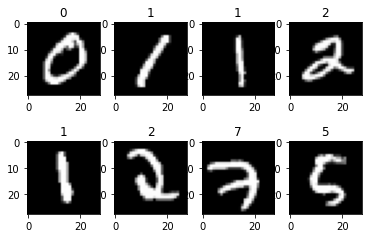

In [215]:
num_list = [1, 3, 8, 5, 200, 400, 5000, 2000]

for cnt, num in enumerate(num_list) : # enumerate는 0번부터 
    plt.subplot(2, int(len(num_list)/2), cnt+1)
    plt.imshow(x_train[num], cmap='gray')
    plt.title(y_train[num])

In [216]:
np.shape(x_train)

(60000, 28, 28)

In [217]:
len(x_train[0])

28

In [218]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28*28을 통해 한줄로 만드는 함수 (한개의 행으로 만듬))
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [219]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 2s 772us/step - loss: 2.4102 - accuracy: 0.7548


In [220]:
# 현재는 Dense만 있어서 weights의 크기는 4 이다 

# model.weights의 현재 구조는 (weights0, bias0, weights1, bias1)

# tf.keras.layers.Dense(128, activation='relu') 여기서 128은 바이어스 갯수의 영향을 준다. 출력되는 값의 개수이기 때문에 

In [222]:
np.shape(model.weights)

(4,)

In [226]:
model.get_config()['layers'][1]['class_name']
print(np.shape(model.weights[0]))
print(np.shape(model.weights[1]))

(784, 128)
(128,)


In [96]:
model.weights[1] # bias 값

<tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
array([-0.03238623, -0.02553798, -0.03344651, -0.02394705, -0.02458079,
       -0.02451537, -0.02882495, -0.01829028, -0.026995  , -0.02645293,
       -0.02736307, -0.02198612, -0.04380678, -0.04164378, -0.01314194,
       -0.02864825, -0.02093824, -0.03518369, -0.0333413 , -0.06351048,
       -0.02119452, -0.01967696, -0.03366745, -0.03018502, -0.0207114 ,
       -0.02129017, -0.03002986, -0.02920851, -0.03269606, -0.02960803,
       -0.03865293, -0.03464957, -0.02609947, -0.02767282, -0.02578239,
       -0.02631284, -0.01173625, -0.02754637, -0.01814933, -0.00867097,
       -0.02185613, -0.01496839, -0.02980659, -0.02225613, -0.04165655,
       -0.03543859, -0.02632481, -0.02445506, -0.01924197, -0.02575943,
       -0.024958  , -0.03394844, -0.03480326, -0.01891107, -0.03701003,
       -0.03152582, -0.0369749 , -0.01867292, -0.0255366 , -0.02455867,
        0.00606362, -0.02525803, -0.02725052, -0.01792588, -0.02196579,
 

In [130]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 10ms/step


array([[0.00000000e+00, 0.00000000e+00, 3.78563577e-32, 1.44496256e-31,
        4.37385133e-36, 2.20251213e-26, 0.00000000e+00, 1.00000000e+00,
        5.67652277e-24, 1.29750455e-11],
       [5.72328427e-05, 1.27595029e-18, 9.99933600e-01, 5.51807418e-08,
        2.09515996e-08, 1.80067655e-10, 9.18146816e-06, 3.85183667e-17,
        3.97151631e-13, 3.64158465e-13],
       [4.84117419e-35, 1.00000000e+00, 6.64372251e-16, 1.30485137e-10,
        2.36030187e-26, 1.14381482e-11, 1.52787975e-16, 2.36920123e-22,
        9.81168136e-14, 3.03804017e-17]], dtype=float32)

In [131]:
pr = model.predict(x_test[:3])
np.argmax(pr[0]), y_test[0]

1/1 [==============================] - 0s 11ms/step


(7, 7)

In [151]:
import numpy as np
a = np.arange(15)
print(a)
print(np.shape(a))
b = a.reshape(15, -1) # (15, -1) = (-1,1) reshape은 행과 열을 만들어주는 함수 
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
(15,)
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]]


In [241]:
x = [[1, 20], [1, 15], [2, 30]]
w = np.array([1, 1])
y = np.array([[20],[15], [25]])
y_hat = np.sum(x*w, axis=1) #np.dot(x,w) # 둘이 같은 내용
y - y_hat # 오차값
np.shape(y), np.shape(y_hat)

((3, 1), (3,))

In [242]:
print(y_hat.reshape(3, 1))
print(y)

[[21]
 [16]
 [32]]
[[20]
 [15]
 [25]]


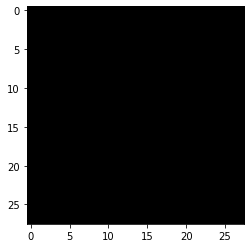

In [170]:
tmp = np.zeros((28, 28))
tmp
plt.imshow(tmp, cmap='gray')

In [147]:
np.shape(x_test[0].reshape(1, 28, 28))
np.argmax(model.predict(x_test[0].reshape(1, 28, 28)))

1/1 [==============================] - 0s 10ms/step


7

In [150]:
# 쉽게 어레이 만들기
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
np.reshape(x, (9,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

(0.0, 1.0)

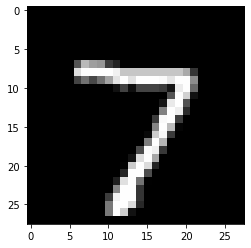

In [243]:
# 스케일링
def a(x) :
    plt.imshow(x, cmap ='gray')

tmp = x_test[0]/255
a(tmp)
tmp.min(), tmp.max()

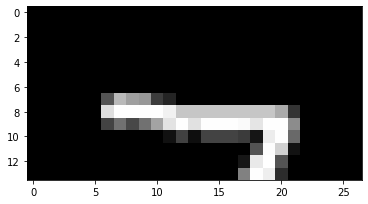

In [244]:
a(x_test[0][:14,:-1])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

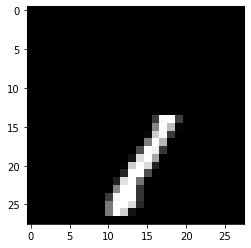

In [246]:
tmp = np.zeros((14, 28))
x_test[0][: 14, :] = x_test[0][:14,:]*tmp
a(x_test[0][...]) # x_test[0][:,:] 모든 행 모든 열을 말한다.
x_test[0]

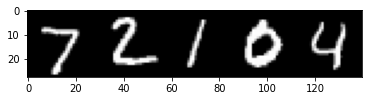

In [182]:
tmp = np.hstack(x_test[:5])
np.shape(tmp)
a(tmp)

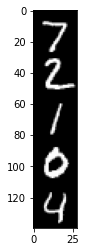

In [183]:
tmp = np.vstack(x_test[:5])
np.shape(tmp)
a(tmp)

In [247]:
from numpy import newaxis # newaxis 차원을 늘려주는 모듈
a = np.array([4., 2.])
print(np.shape(a))
b = a[..., newaxis]
c = a[newaxis, ...]
print(np.shape(b))
print(np.shape(c))

(2,)
(2, 1)
(1, 2)


In [248]:
# 같은 내용
# x_test[0].reshape(1, 28, 28)
# x_test[0].reshape(newaxis, ...)

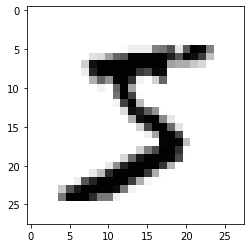

In [188]:
tmp = 255 - x_train[0]
np.shape(tmp)

plt.imshow(tmp, cmap="gray")

In [254]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 2s 750us/step - loss: 0.2943 - accuracy: 0.9135
Epoch 2/20
1875/1875 [==============================] - 1s 741us/step - loss: 0.1428 - accuracy: 0.9567
Epoch 3/20
1875/1875 [==============================] - 1s 740us/step - loss: 0.1076 - accuracy: 0.9672
Epoch 4/20
1875/1875 [==============================] - 1s 741us/step - loss: 0.0875 - accuracy: 0.9731
Epoch 5/20
1875/1875 [==============================] - 1s 742us/step - loss: 0.0744 - accuracy: 0.9764
Epoch 6/20
1875/1875 [==============================] - 1s 746us/step - loss: 0.0669 - accuracy: 0.9787
Epoch 7/20
1875/1875 [==============================] - 1s 751us/step - loss: 0.0567 - accuracy: 0.9816
Epoch 8/20
1875/1875 [==============================] - 1s 745us/step - loss: 0.0545 - accuracy: 0.9819
Epoch 9/20
1875/1875 [==============================] - 1s 745us/step - loss: 0.0484 - accuracy: 0.9841
Epoch 10/20
1875/1875 [==============================] - 1s 754u

[0.08874715864658356, 0.9789000153541565]

In [256]:
pr = model.predict(x_test)
np.argmax(pr[0]), y_test[0]

313/313 [==============================] - 0s 536us/step


array([[5.6659266e-10, 2.6930576e-13, 2.7580425e-09, ..., 9.9998987e-01,
        1.0224758e-09, 3.7084103e-08],
       [2.0120014e-17, 1.1616712e-09, 1.0000000e+00, ..., 1.0192975e-26,
        4.1829607e-14, 1.4034684e-24],
       [6.5212247e-14, 9.9999309e-01, 7.0455542e-08, ..., 2.9478840e-06,
        3.2957830e-06, 1.2311934e-11],
       ...,
       [5.6447738e-21, 7.0573879e-17, 1.8828818e-20, ..., 1.2576623e-08,
        1.1148563e-08, 6.3685197e-06],
       [3.6230847e-16, 5.6304321e-13, 1.8379875e-14, ..., 6.1234468e-16,
        4.7564083e-07, 2.8498124e-13],
       [1.6763355e-13, 1.7927522e-22, 2.3340374e-10, ..., 7.8944728e-21,
        6.2929820e-16, 9.2411594e-22]], dtype=float32)

In [190]:
# 이미지파일 불러오기 
# !pip install PILLOW

(28, 28)
1/1 [==============================] - 0s 12ms/step


5

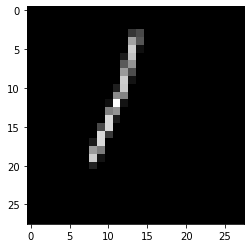

In [258]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('b.jpg').convert('L')
img = img.resize((28, 28))
# 255- 하는 이유는 훈련데이터는 검정색배경, 흰색 글자,
# 내가 만든 사진은 흰색배경, 검정글자 여서 흰색, 검정색 반전용
# 이 자료는 233인가가 제일 큰 값이라서 255- 대신
# np.array(img).max()- 해도 됨
arr = (255-np.array(img))/255
print(np.shape(img))
plt.imshow(arr, cmap = 'gray')
arr.min(), arr.max()

pr = model.predict(arr.reshape(-1, 28, 28))
np.argmax(pr)

In [267]:
pr = model.predict(x_test[:3])
np.argmax(pr[1]), y_test[1]

1/1 [==============================] - 0s 11ms/step


(2, 2)

### 브로드캐스팅

In [277]:
x = [[1, 20], [2, 15], [1, 20]]

w = np.array([[[3]]]) # 63 51 36
# w = np.array([[[3]]]) # 12, 165


# w = np.array([[3,3]])
# w = np.array([[3,3], [3,3], [3,3]])
# w = np.array(3)
np.sum(x*w, axis=1)

array([[ 12, 165]])

(1280, 853)
(853, 1280, 3)


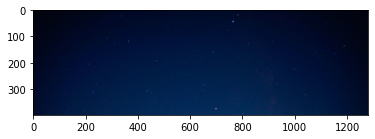

In [288]:
img1 = Image.open('sky0.jpg')
print(img1.size) # 열 너비 570, 행 높이 379
print(np.shape(img1))
img1 = np.array(img1)
plt.imshow(img1[:400,:])

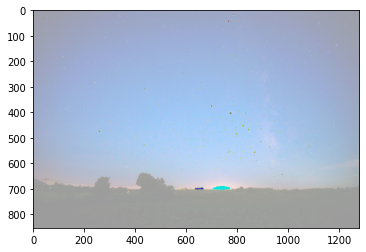

In [293]:
plt.imshow(img1-100)

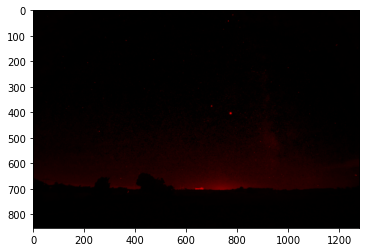

In [294]:
plt.imshow(img1*[1, 0, 0]) # 빨강색만 나오게 하는

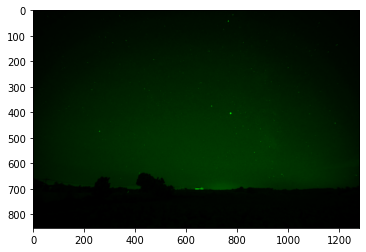

In [295]:
plt.imshow(img1*[0, 1, 0]) # 초록색만 나오게 하는

In [296]:
np.mean(img1) # 평균이 낮으면 어두운 경우임

27.335650217370066

In [297]:
img2 = Image.open('sky1.jpg')
print(img2.size)
img2 = np.array(img2)
np.mean(img2), np.std(img2)

(540, 802)


(101.59744927803946, 42.729366347492906)

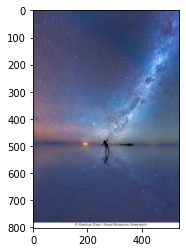

In [299]:
plt.imshow(img2)

In [310]:
img1 = Image.open('sky0.jpg')
img1 = img1.resize((240, 200)) # np.shape 하면 200, 240이 됨
img1 = np.array(img1)

img2 = Image.open('sky1.jpg')
img2 = img2.resize((240, 200))
img2 = np.array(img2)

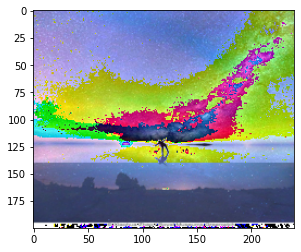

In [317]:
plt.imshow(img1+img2)

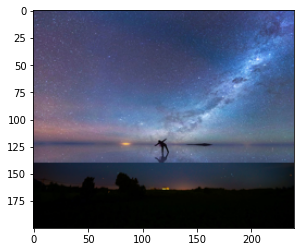

In [318]:
img1[:140,:] = img2[:140, :]

plt.imshow(img1)

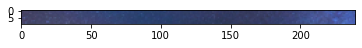

In [335]:
plt.imshow(img1[:10,:])

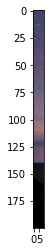

In [323]:
plt.imshow(img1[:,:10])

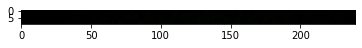

In [337]:
plt.imshow(img1[-10:,:])

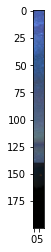

In [332]:
plt.imshow(img1[:,-10:])

In [342]:
img1[-10:,:] = [255, 0, 0]
img1[:10,:] = [255, 0, 0]
img1[:,:10] = [255, 0, 0]
img1[:,-10:] = [255, 0, 0]

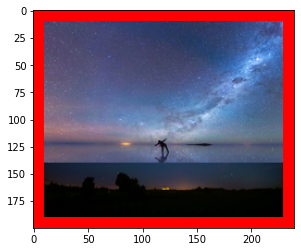

In [343]:
plt.imshow(img1)

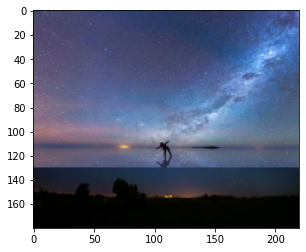

In [345]:
plt.imshow(img1[10:190,10:230])

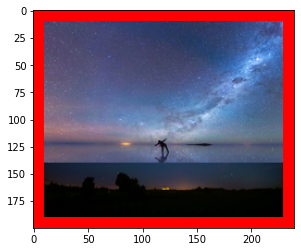

In [358]:
back = np.zeros((200, 240, 3), dtype=np.int16)
back[...] = [255, 0, 0]
back[10:190, 10:230] = img1[10:190, 10:230]
plt.imshow(back)